<a href="https://colab.research.google.com/github/kanishquetyagi/Hotel_Booking_Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_dir = '/content/drive/MyDrive/AlmaBetter/Module 1/capastone/Hotel Bookings.csv'

In [ ]:
df = pd.read_csv(working_dir)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [ ]:
df['arrival_date_year'].value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [ ]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

- BB: Bed & Breakfast

- HB: Half Board (Breakfast and Dinner normally)

- FB: Full Board (Beakfast, Lunch and Dinner)

- SC: Self Catering

- Undefined: ?

In [ ]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
GUY        1
SLE        1
AIA        1
BFA        1
MMR        1
Name: country, Length: 177, dtype: int64

In [ ]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

Market segmentation is dividing your target market into approachable groups, but the data inside market segment gives the info of distribution channel.

In [ ]:
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [ ]:
df['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [ ]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

Customer Type can be referred as market segmentation as it is the division of customer into groups based on some factors.

In [ ]:
df['adr']

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 119390, dtype: float64

ADR (Average Daily Rate) measures the average rental revenue earned for an occupied room per day. 

In [ ]:
# Checking for Null Values in dataset

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Only 4 columns are Having null values. Those are

*   Children - 4
*   Country  - 488
*   Agent    - 16340
*   Company  - 112593



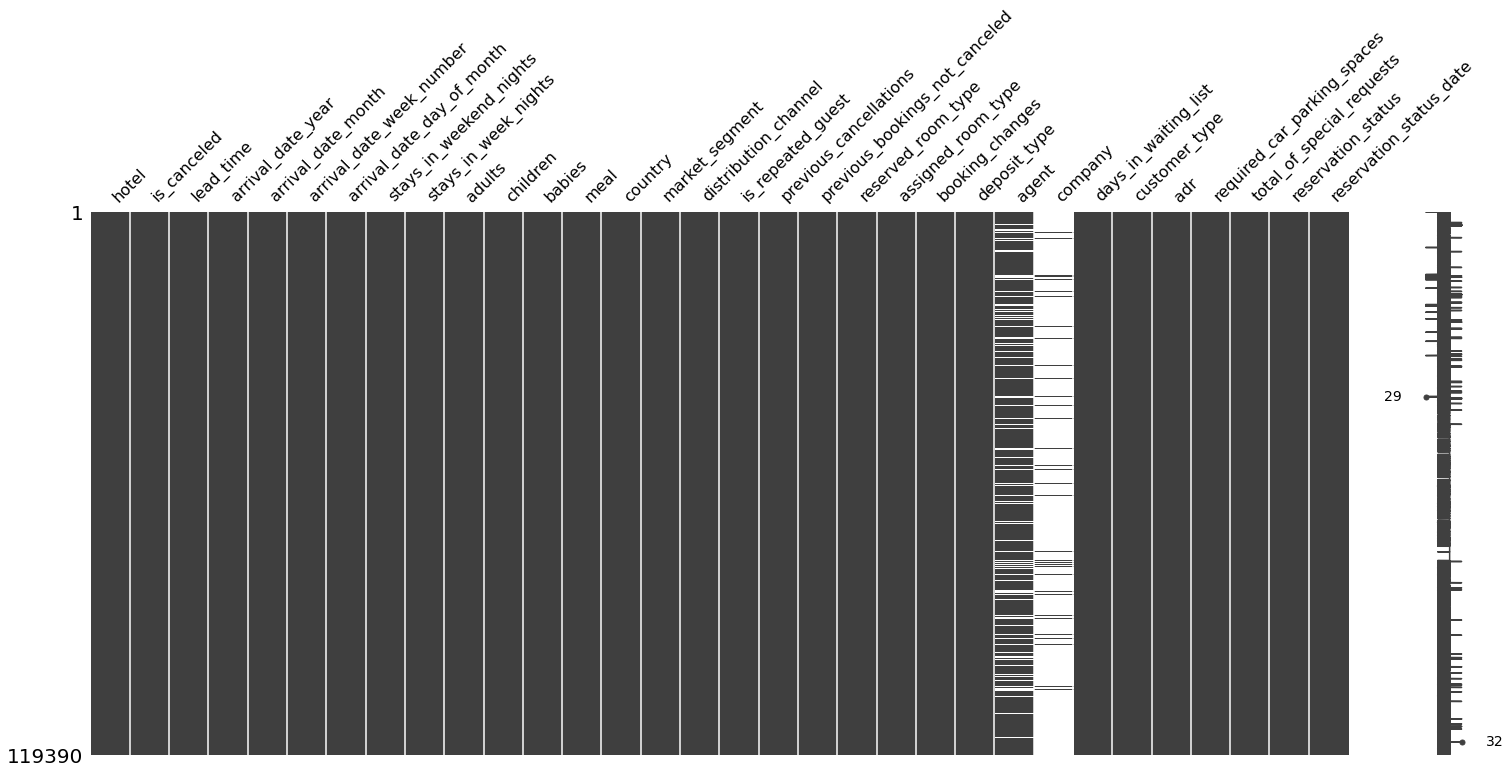

In [ ]:
msno.matrix(df)

<h3>We can see from the graph that Company column got "NULL" values above 90%. "NULL" Values in Agent and Company col. refers to those booking which are not booked by any third party (Agent). These values can't be considered as missing instead we can take them as the records which are not booked with the help of any Agent/Company.</h3>

In [ ]:
#Creating the copy of DataFrame as to avoid any changes in original Dataset.
df_hotel = df.copy()

<h3>We can fill the 'NULL' values with 0 in Agent and Company column as to consider that there is no third party involvement.</h3>


In [ ]:
df_hotel[['agent','company']] = df_hotel[['agent','company']].fillna(0.0)

<h3>We also got some 'NULL' values in Country column. Hence, replacing them with its Mode.

In [ ]:
df_hotel['country'].fillna(df.country.mode().to_string(), inplace=True)

<h3> Replacing the 'NULL' values in Children by their Mean Value.</h3>

In [ ]:
df_hotel['children'].fillna(round(df.children.mean()), inplace=True)

In [ ]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<h3>There are some columns namely: 'Adults', 'Children', 'Babies' where the combined value of all leads to 0 which makes no sense and are of no use. Therefore, we can drop such rows from the daataset.</h3>

In [ ]:
df_hotel = df_hotel.drop(df_hotel[(df_hotel.adults + df_hotel.babies + df_hotel
                                   .children)==0].index)

In [ ]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

#<h2>Problem 1.</h2>
<h3>No of bookings made and Cancelled.</h3>

Text(0, 0.5, 'No. of Hotels')

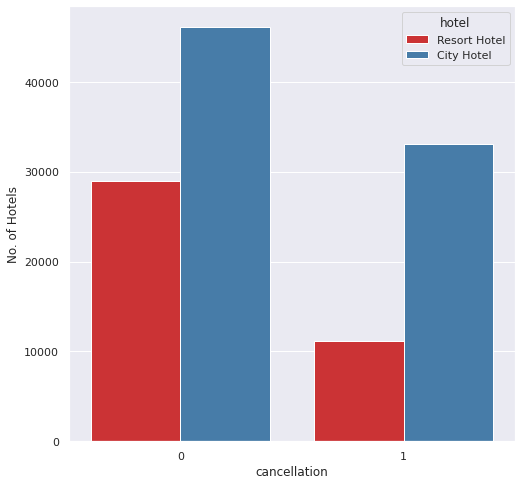

In [ ]:
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid",font='sans-serif')
ax = sns.countplot(x="is_canceled", hue ='hotel',data=df_hotel,palette="Set1")
plt.xlabel("cancellation", fontsize=12)
plt.ylabel("No. of Hotels", fontsize=12)

The No of Bookings cancelled in City Hotel are more than Resort Hotel. Also, the Bookings made are more in City Hotel than Resort Hotel.<br>
We can say that the Customer are more attracted towards City Hotel than Resort Hotel.


# <h2>Problem 2.</h2>
<h3>Percentage of Hotel booked in each year. </h3>

In [ ]:
df_hotel['arrival_date_year'].value_counts()

2016    56623
2017    40620
2015    21967
Name: arrival_date_year, dtype: int64

In [ ]:
56623*100/len(df_hotel['arrival_date_year'])

47.498532002348796

In [ ]:
df_hotel_per_year = df_hotel['arrival_date_year'].value_counts(normalize=
                    True).mul(100).reset_index().rename(columns ={'index':
                  'Year_of_Booking','arrival_date_year':'Booking_percentage'})
df_hotel_per_year

,Year_of_Booking,Booking_percentage
0,2016,47.498532
1,2017,34.074323
2,2015,18.427145


In [ ]:
df_hotel_per_year = df_hotel['arrival_date_year'].value_counts(normalize=
                    True).mul(100).reset_index()
df_hotel_per_year

,index,arrival_date_year
0,2016,47.498532
1,2017,34.074323
2,2015,18.427145


In [ ]:
#plt.figure(figsize=(8,8))
# sns.set_theme(style="darkgrid",font='sans-serif')
# ax = sns.barplot(x="Year_of_Booking", y="Booking_percentage",palette="Set1", data=df_hotel_per_year,label = "Positive")
# plt.xlabel("Year", fontsize=12)
# plt.ylabel("Booking percentage", fontsize=12)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


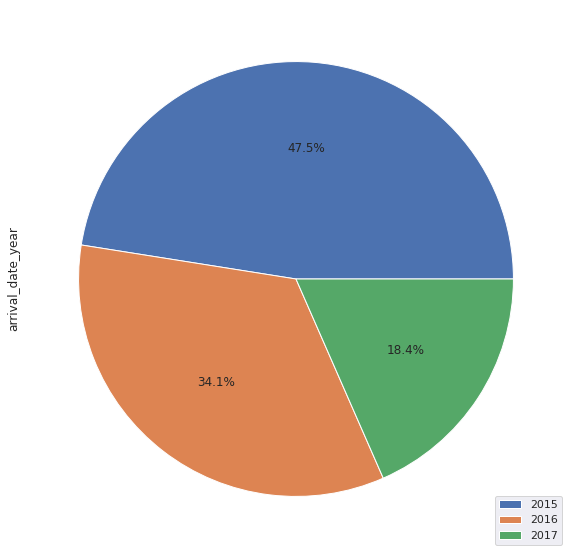

In [ ]:
def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 10 else ''

my_labels = ('2015','2016','2017')

ax = df_hotel['arrival_date_year'].value_counts(normalize=True).mul(100).plot(kind='pie', figsize=(20,10),autopct='%1.1f%%', labels=None)
ax.axes.get_yaxis().set_visible(True)
plt.legend(loc='upper_right', labels=my_labels)

Summary: We can see that year 2016 has highest no of bookings and year 2015 has lowest no of bookings.

# <h2>Problem 3.</h2>
<h3>No. of Arrivals per Month </h3>

Text(0, 0.5, 'Count')

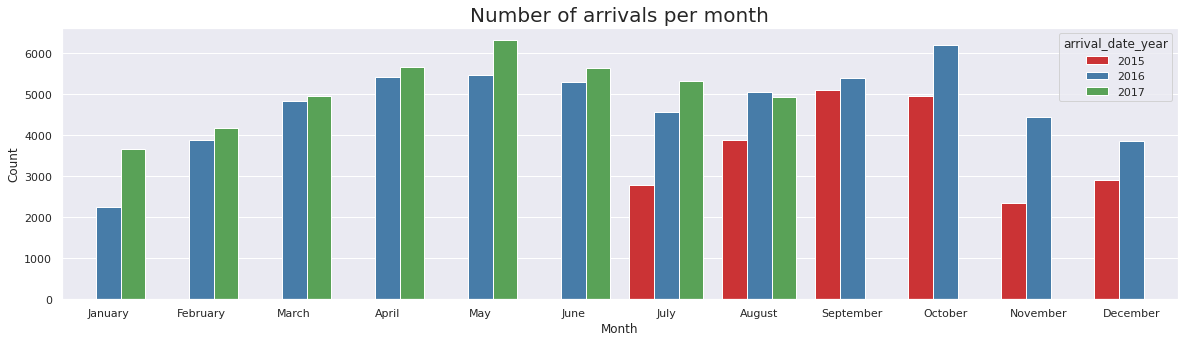

In [ ]:
plt.figure(figsize=(20,5)) # adjust the size of the plot
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']
sns.countplot(data = df_hotel, x = 'arrival_date_month', hue = 'arrival_date_year',palette = 'Set1',order = new_order).set_title('Number of arrivals per month',fontsize=20)
plt.xlabel('Month') # Creating label for xaxis
plt.ylabel('Count') # Creating label for yaxis

Summary:<br>
From the graph, we can observe that only year 2016 has highest no. of bookings. The data shows the bookings from 2015, July till 2017, August.

# <h2>Problem 4.</h2>
<h3>Which are the most booked accomodation type?. </h3>

Assumptions made:<br>
Single - 1 Adult, 0 Children , 0 Babies<br>
Couple - 2 Adult, 0 Children , 0 Babies<br>
Family - Adult + Children + Babies = 3 or greater than 3<br>


In [ ]:
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
bookings = df_hotel[df_hotel['is_canceled']==0].shape[0]
single = df_hotel[df_hotel['is_canceled']==0][(df_hotel['adults']==1) & (df_hotel['children'] == 0) & (df_hotel['babies'] == 0)]
couple = df_hotel[df_hotel['is_canceled']==0][(df_hotel['adults']==2) & (df_hotel['children'] == 0) & (df_hotel['babies'] == 0)]
family = df_hotel[df_hotel['is_canceled']==0][(df_hotel['adults']) + (df_hotel['children']) + (df_hotel['babies'] ) > 2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [ ]:
df_hotel[df_hotel['is_canceled']==0].shape[0]

75011

In [ ]:
list_type = [single,couple,family]
accomodation_type = ['Single','Couple','Family']
percentage = []
for val in list_type:
  percentage.append(round(len(val)*100/bookings))
#percentage
#dict_ = {"Accomodation Type":accomodation_type, "Accomodaation percentage":percentage}
df_accomodation_percent =pd.DataFrame({"Accomodation_Type":accomodation_type, "Accomodation_percentage":percentage})
df_accomodation_percent

,Accomodation_Type,Accomodation_percentage
0,Single,21
1,Couple,66
2,Family,13


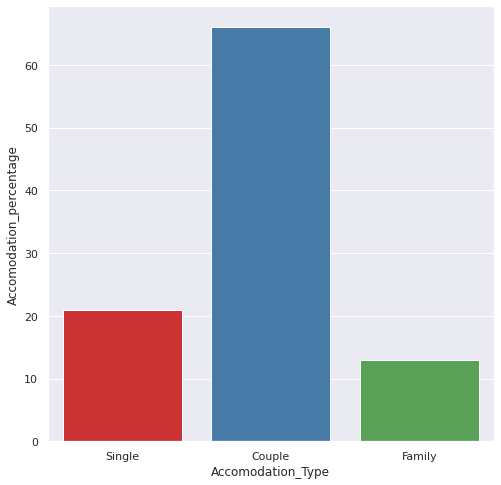

In [ ]:
plt.figure(figsize=(8,8))                   
sns.set_theme(style="darkgrid",font='sans-serif')
ax = sns.barplot(x="Accomodation_Type", y="Accomodation_percentage",palette = 'Set1', data = df_accomodation_percent)

Summary:<br>
From the Bar plot we can say that **Couple books Most No. of Hotels** and **Family books Least No. of Hotels**

# <h2>Problem 5.</h2>
<h3>Which type of Hotel Category has most no. of Special Requests?</h3>

In [ ]:
single.groupby('hotel')['total_of_special_requests'].sum().reset_index()
couple.groupby('hotel')['total_of_special_requests'].sum().reset_index()
family.groupby('hotel')['total_of_special_requests'].sum().reset_index()


,hotel,total_of_special_requests
0,City Hotel,7330
1,Resort Hotel,3243


In [ ]:
city_bar = [4212,22362,7330]
resort_bar = [1967, 14152, 3243]
width_bar = 0.25

range1 = np.arange(len(city_bar))
range2 = [val + width_bar for val in range1]

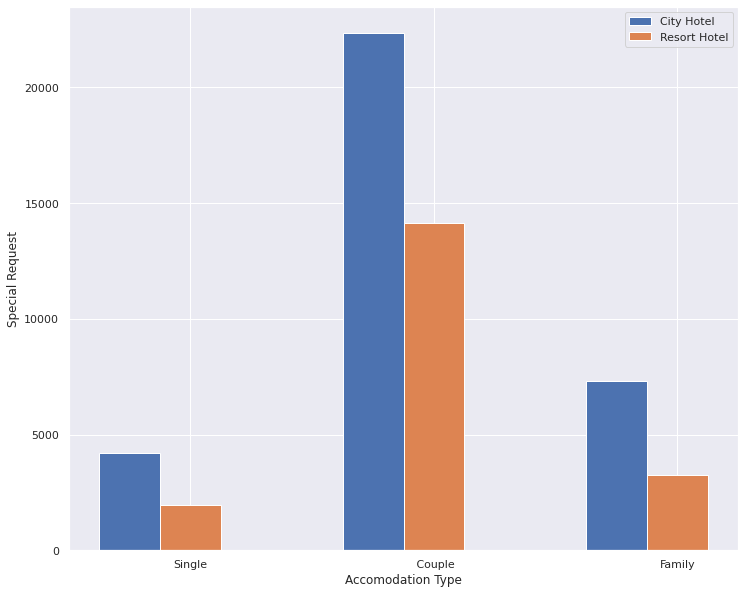

In [ ]:
plt.figure(figsize=(12,10))
plt.bar(range1, city_bar, width=width_bar, label='City Hotel')
plt.bar(range2, resort_bar, width=width_bar,label='Resort Hotel')
plt.xticks([val + width_bar for val in range(len(city_bar))], ['Single',' Couple','Family'])
plt.xlabel('Accomodation Type')
plt.ylabel('Special Request')
plt.legend(loc = 'best')
plt.show()

# <h2>Problem 6.</h2>
<h3>How deposit type affects the bookings? </h3>

In [ ]:
df_is_cancelled = df_hotel[df_hotel['is_canceled']==1]
df_deposit_type = df_is_cancelled.groupby('deposit_type')['is_canceled'].describe()
df_deposit_type

,count,mean,std,min,25%,50%,75%,max
deposit_type,,,,,,,,
No Deposit,29669.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Non Refund,14494.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Refundable,36.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Cancelations Mean')

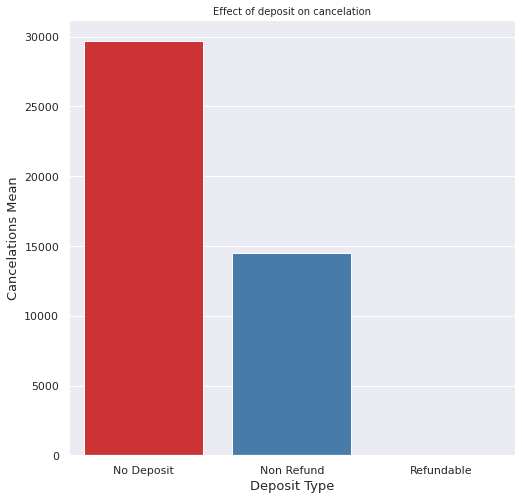

In [ ]:
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid",font='sans-serif')
ax = sns.barplot(df_deposit_type.index, df_deposit_type["count"].values, palette = "Set1")
plt.title("Effect of deposit on cancelation", fontsize=10)
plt.xlabel("Deposit Type", fontsize=13)
plt.ylabel("Cancelations Mean", fontsize=13)

Summary:<br>
Acc. to the bar plot the bookings of Customer with **'No Deposit'** type got cancelled. Maximum no of bookings that got cancelled are of **'No deposit'**  type.

# <h2>Problem 7.</h2>
<h3>Highest number of Bookings and Cancellations</h3>

In [ ]:
df_booking = df_hotel[df_hotel['is_canceled'] == 0]['arrival_date_month'].value_counts().reset_index()

Text(0.5, 0, 'Months')

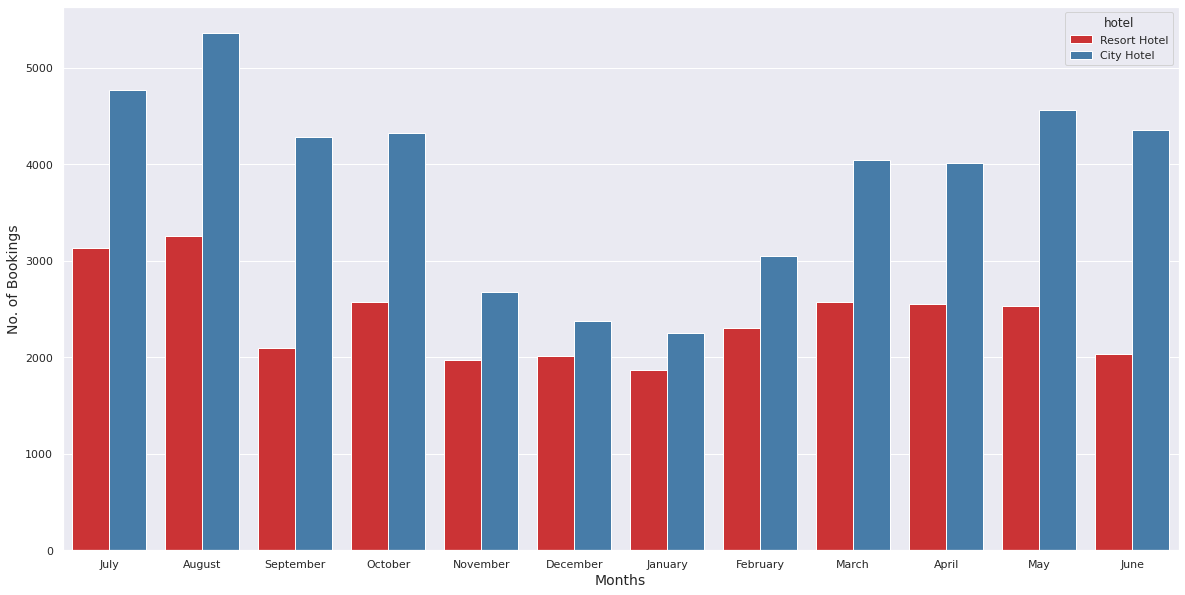

In [ ]:
plt.figure(figsize = (20,10))
sns.set_theme(style="darkgrid",font='sans-serif')
ax = sns.countplot(x = 'arrival_date_month' ,hue = 'hotel',palette = 'Set1',data = df_hotel[df_hotel['is_canceled'] == 0])
ax.set_ylabel('No. of Bookings', fontsize = 14)
plt.xlabel("Months", fontsize=14)


In [ ]:
df_cancellation = df_hotel[df_hotel['is_canceled'] == 1]['arrival_date_month'].value_counts().reset_index()

Text(0.5, 0, 'Months')

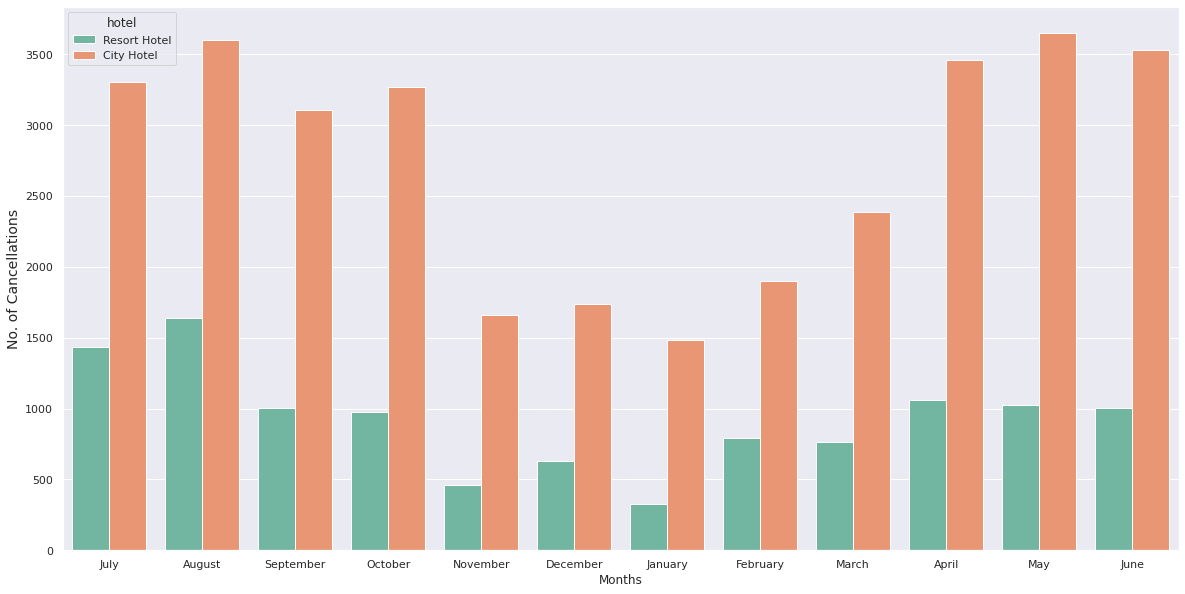

In [ ]:
plt.figure(figsize = (20,10))
sns.set_theme(style="darkgrid",font='sans-serif')
ax = sns.countplot(x = 'arrival_date_month' ,hue = 'hotel',palette = 'Set2',data = df_hotel[df_hotel['is_canceled'] == 1])
ax.set_ylabel('No. of Cancellations', fontsize = 14)
plt.xlabel("Months", fontsize=12)


Summary:
Highest no of Bookings were made in the month of August for both types of Hotel while that of Highest no of Cancellations were made in the month of May for City Hotel and August for Resort Hotel.
Maybe its due to the weather 

# <h2>Problem 8.</h2>
<h3>Price of a room per night for Customer</h3>

In [ ]:
df_booking = df_hotel[df_hotel['is_canceled'] == 0]
df_hotel_customer = df_booking[df_booking['adr']!=0][['hotel','arrival_date_year','arrival_date_month','adults','children','adr']]
df_hotel_customer['price_per_night'] = df_hotel_customer['adr']/(df_hotel_customer['adults']+df_hotel_customer['children'])
df_hotel_customer

,hotel,arrival_date_year,arrival_date_month,adults,children,adr,price_per_night
2,Resort Hotel,2015,July,1,0.0,75.00,75.000000
3,Resort Hotel,2015,July,1,0.0,75.00,75.000000
4,Resort Hotel,2015,July,2,0.0,98.00,49.000000
5,Resort Hotel,2015,July,2,0.0,98.00,49.000000
6,Resort Hotel,2015,July,2,0.0,107.00,53.500000
...,...,...,...,...,...,...,...
119385,City Hotel,2017,August,2,0.0,96.14,48.070000
119386,City Hotel,2017,August,3,0.0,225.43,75.143333
119387,City Hotel,2017,August,2,0.0,157.71,78.855000
119388,City Hotel,2017,August,2,0.0,104.40,52.200000


(0.0, 200.0)

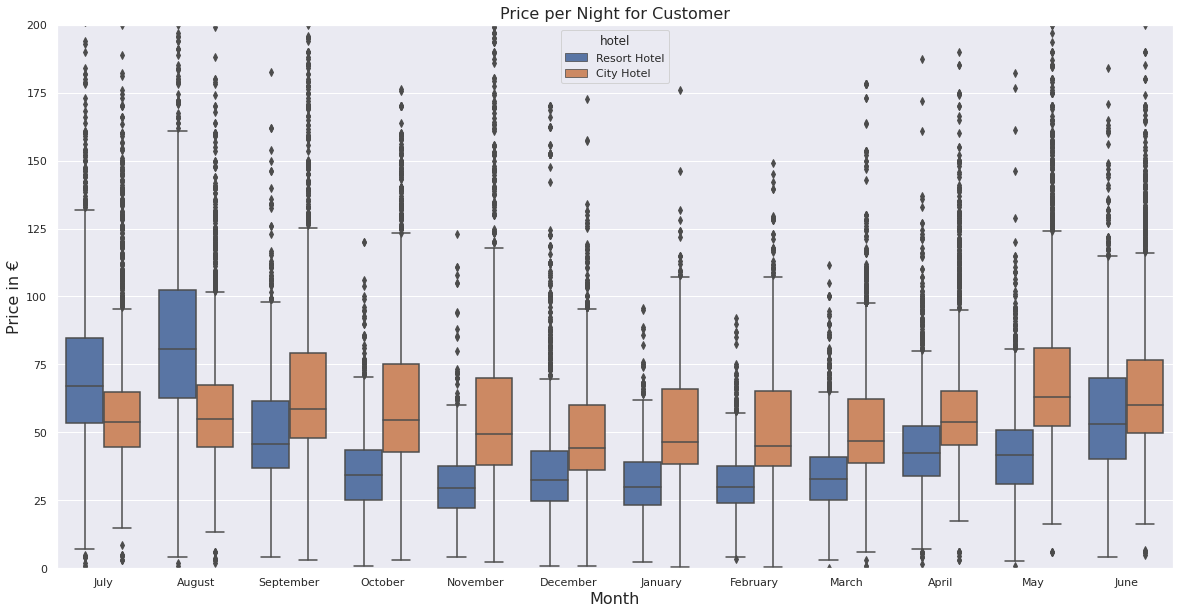

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="arrival_date_month",y="price_per_night",hue="hotel",data=df_hotel_customer)
plt.title("Price per Night for Customer", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Price in €", fontsize=16)
plt.ylim(0, 200)

Summary:<br>
From the above Boxplot, we can see that Price per room is maximum in 'August' for Resort Hotel which is around 100€ and 'May' for City Hotel which is around 80€.

In [ ]:
df_adr = df_hotel.groupby("adr")["is_canceled"].describe()
df_adr

,count,mean,std,min,25%,50%,75%,max
adr,,,,,,,,
-6.38,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
0.00,1810.0,0.103867,0.305173,0.0,0.0,0.0,0.0,1.0
0.26,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
0.50,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
1.00,14.0,0.214286,0.425815,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
450.00,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
451.50,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
508.00,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0


(0.0, 100.0)

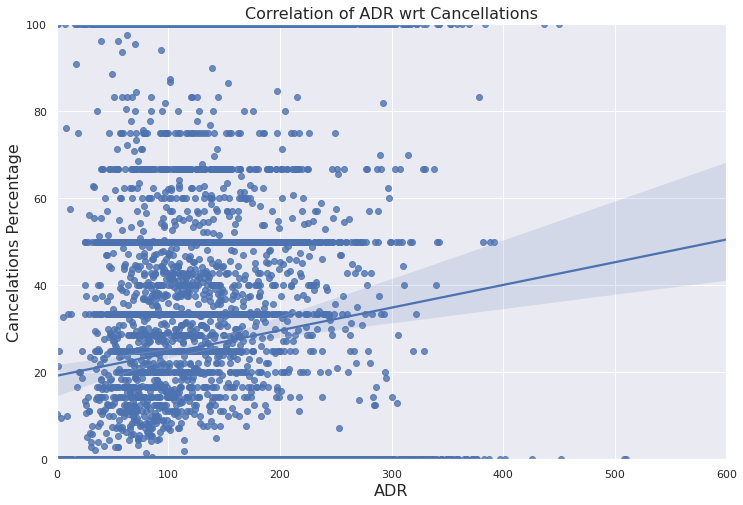

In [ ]:
plt.figure(figsize=(12, 8))
sns.regplot(x=df_adr.index, y=df_adr["mean"].values * 100)
plt.title("Correlation of ADR wrt Cancellations", fontsize=16)
plt.xlabel("ADR", fontsize=16)
plt.ylabel("Cancelations Percentage", fontsize=16)


# <h2>Problem 9.</h2>
<h3>Which distribution channel is preferred the most no. of booking?</h3>

In [ ]:
dist_channel=df_booking["market_segment"].value_counts()
dist_channel

Online TA        35673
Offline TA/TO    15880
Direct           10648
Groups            7697
Corporate         4291
Complementary      639
Aviation           183
Name: market_segment, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  after removing the cwd from sys.path.


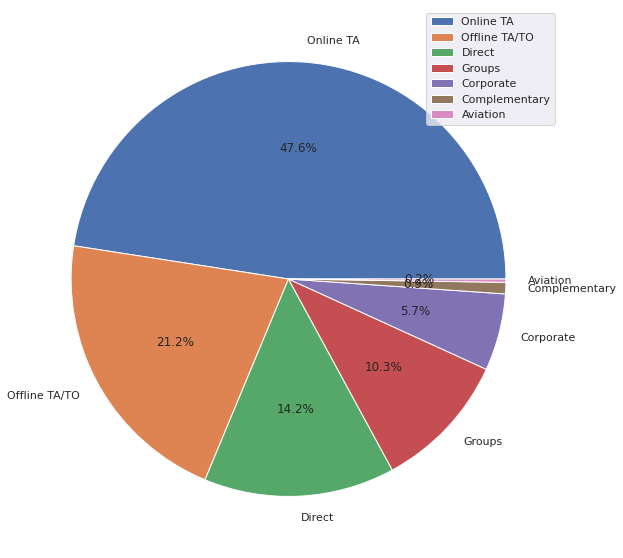

In [ ]:
plt.figure(figsize=(20,10))
dist_channel=df_booking["market_segment"].value_counts()
ax = plt.pie(dist_channel,labels=dist_channel.index,autopct='%1.1f%%')
plt.legend(ax, labels = dist_channel.index, loc="best")



Summary:<br>
Online TA is the highest among all with 47.6% bookings while Aviation is the lowest with 0.2% bookings through it.

#<h2>Problem 10</h2>
 <h3>Distribution of Lead Time.</h3

Lead Time : Difference between booked time and checked-in time.

In [ ]:
df_hotel.lead_time.describe()

count    119210.000000
mean        104.109227
std         106.875450
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64

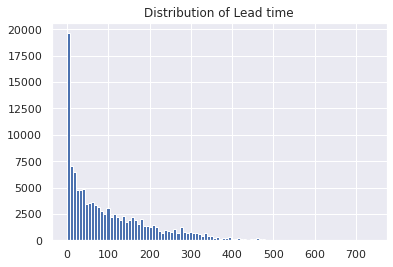

In [ ]:
plt.title("Distribution of Lead time")
plt.hist(df_hotel.lead_time,  bins=100);

(array([6264., 3445., 2065., 1815., 1710., 1563., 1444., 1329., 1138.,
        1965.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

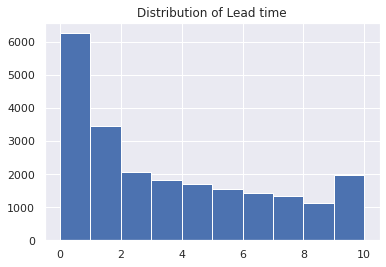

In [ ]:
plt.title("Distribution of Lead time")
plt.hist(df_hotel.lead_time, bins=[0,1,2,3,4,5,6,7,8,9,10])

Summary:<br>
We can see that around 6000 customers made bookings on the same day when they checked in.

In [ ]:
df_lead_time = df_hotel.groupby('lead_time')['is_canceled'].describe()
df_lead_time

,count,mean,std,min,25%,50%,75%,max
lead_time,,,,,,,,
0,6264.0,0.066571,0.249297,0.0,0.0,0.0,0.0,1.0
1,3445.0,0.092308,0.289502,0.0,0.0,0.0,0.0,1.0
2,2065.0,0.103148,0.304225,0.0,0.0,0.0,0.0,1.0
3,1815.0,0.100275,0.300450,0.0,0.0,0.0,0.0,1.0
4,1710.0,0.102339,0.303182,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
622,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
626,30.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
629,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [ ]:
lead_time_df = df_hotel.groupby('lead_time')['is_canceled'].describe()
lead_time_df

,count,mean,std,min,25%,50%,75%,max
lead_time,,,,,,,,
0,6264.0,0.066571,0.249297,0.0,0.0,0.0,0.0,1.0
1,3445.0,0.092308,0.289502,0.0,0.0,0.0,0.0,1.0
2,2065.0,0.103148,0.304225,0.0,0.0,0.0,0.0,1.0
3,1815.0,0.100275,0.300450,0.0,0.0,0.0,0.0,1.0
4,1710.0,0.102339,0.303182,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
622,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
626,30.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
629,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


(0.0, 100.0)

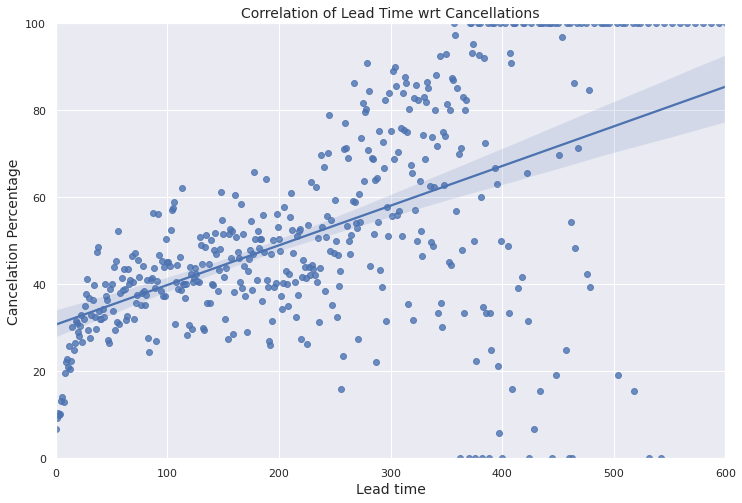

In [ ]:
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_time_df.index, y=lead_time_df["mean"].values * 100)
plt.title("Correlation of Lead Time wrt Cancellations", fontsize=14)
plt.xlabel("Lead time", fontsize=14)
plt.ylabel("Cancelation Percentage", fontsize=14)
plt.xlim(0,600)
plt.ylim(0,100)

Summary:<br>
From this correlation graph, we can see that when the lead time increases it results in increase of the cancellation.